In [7]:
library(igraph)
library(proxy)

In [62]:
mce <- function(x, n, centring){
	
# This code is performs just MCE and ncMCE (both SVD-based)

	#Given a distance or correlation matrix x, it performs Minimum Curvilinear 
	#Embedding (MCE) or non-centred MCE (ncMCE) (coded 24-March-2013 by 
	#Gregorio Alanis-Lobato and checked by Carlo Vittorio Cannistraci)

	#INPUT
	#   x => Distance (example: Euclidean) or distance-adjusted correlation matrix (example: x = 1 - Pearson_correlation)
	#   n => Dimension into which the data is to be embedded
	#   centring => 'yes' if x should be centred or 'no' if not
	#OUTPUT
	#   s => Coordinates of the samples being embedded into the reduced n-dimesional space

	#Make sure the required library 'igraph' is installed and load it
	if(require("igraph")){
		print("igraph has been loaded...");
	} else{
		print("Trying to install igraph...");
		install.packages("igraph");
		if(require("igraph")){
			print("igraph has been installed and loaded...");
		} else{
			stop("Could not install igraph");
		}
	}

	#Make sure the matrix is symmetric
	x <- pmax(x, t(x));

	#Create a graph object out of the adjacency matrix x
	g <- graph.adjacency(x, mode = "undirected", weighted = TRUE);

	#MC-kernel computation
	mst <- minimum.spanning.tree(g);
	kernel <- shortest.paths(mst);

	#Kernel centring
	if(centring == "yes"){
		N <- nrow(kernel);
		J <- diag(N) - (1/N)*matrix(1, N, N); #Form the centring matrix J
		kernel <- (-0.5)*(J %*% kernel^2 %*% J);
	}

	#SVD-based Embedding
	res <- svd(kernel);
	L <- diag(res$d);
	V <- res$v;

	sqrtL <- sqrt(L[1:n, 1:n]);
	V <- V[, 1:n];

	s <- t(sqrtL %*% t(V));

	return(s);
}

In [99]:
# dd <- read.table("Uetz_screen.txt")
# G <- graph.data.frame(dd, directed=FALSE)
# G <- graph("Zachary")
G <- read_graph("embedded_network_69.gml", format="gml")
G_decomposed <- decompose(G)
G <- G_decomposed[[which.max(sapply(G_decomposed, function(i) length(V(i))))]]
G <- simplify(G)

In [100]:
A <- as.matrix(as_adj(G))

In [101]:
A <- as.matrix(dist(A, method = "cosine"))

In [114]:
d <- 50
X <- mce(x = A, n = d+1, centring = "no")
X <- X[,1:d+1]

[1] "igraph has been loaded..."


In [115]:
D <- as.matrix(dist(X))

In [116]:
H <- graph_from_adjacency_matrix(D, mode="undirected", weighted = T)

In [117]:
H

IGRAPH UNW- 512 130816 -- 
+ attr: name (v/c), weight (e/n)
+ edges (vertex names):
 [1] 1--2  1--3  1--4  1--5  1--6  1--7  1--8  1--9  1--10 1--11 1--12 1--13
[13] 1--14 1--15 1--16 1--17 1--18 1--19 1--20 1--21 1--22 1--23 1--24 1--25
[25] 1--26 1--27 1--28 1--29 1--30 1--31 1--32 1--33 1--34 1--35 1--36 1--37
[37] 1--38 1--39 1--40 1--41 1--42 1--43 1--44 1--45 1--46 1--47 1--48 1--49
[49] 1--50 1--51 1--52 1--53 1--54 1--55 1--56 1--57 1--58 1--59 1--60 1--61
[61] 1--62 1--63 1--64 1--65 1--66 1--67 1--68 1--69 1--70 1--71 1--72 1--73
[73] 1--74 1--75 1--76 1--77 1--78 1--79 1--80 1--81 1--82 1--83 1--84 1--85
[85] 1--86 1--87 1--88 1--89 1--90 1--91 1--92 1--93 1--94 1--95 1--96 1--97
+ ... omitted several edges

In [118]:
mst <- minimum.spanning.tree(H)
SP <- distances(mst)
colnames(SP) <- V(G)
rownames(SP) <- V(G)

In [119]:
SP

,1,2,3,4,5,6,7,8,9,10,⋯,503,504,505,506,507,508,509,510,511,512
1,0.000000,11.6329176,16.3315167,1.6849662,10.091062,1.5367739,15.824457,12.412445,9.639429,2.685667,⋯,19.509760,16.860727,24.27757,19.431059,15.836911,7.348122,18.886664,7.422255,10.621831,4.905438
2,11.632918,0.0000000,23.1663990,9.9479514,16.925945,10.0961437,22.659339,19.247328,16.474312,14.318585,⋯,26.344643,23.695609,31.11246,26.265942,22.671793,17.970004,25.721546,14.257137,17.456714,15.527320
3,16.331517,23.1663990,0.0000000,14.6465504,10.507905,14.7947428,1.669946,4.491427,17.455027,19.017184,⋯,17.787560,15.138527,22.55537,17.708859,14.114711,22.668603,17.164463,15.237852,18.437429,20.225919
4,1.684966,9.9479514,14.6465504,0.0000000,8.406096,0.1481923,14.139490,10.727479,7.954463,4.370634,⋯,17.824794,15.175761,22.59261,17.746093,14.151945,8.022052,17.201697,5.737289,8.936865,5.579369
5,10.091062,16.9259447,10.5079046,8.4060961,0.000000,8.5542884,10.000845,6.588833,11.214572,12.776730,⋯,13.686148,11.037115,18.45396,13.607447,10.013299,16.428148,13.063052,8.997398,12.196974,13.985465
6,1.536774,10.0961437,14.7947428,0.1481923,8.554288,0.0000000,14.287683,10.875671,8.102655,4.222441,⋯,17.972986,15.323953,22.74080,17.894286,14.300137,7.873860,17.349890,5.885481,9.085058,5.431177
7,15.824457,22.6593390,1.6699458,14.1394904,10.000845,14.2876828,0.000000,3.984367,16.947967,18.510124,⋯,17.280500,14.631467,22.04831,17.201799,13.607651,22.161543,16.657403,14.730792,17.930369,19.718859
8,12.412445,19.2473276,4.4914271,10.7274790,6.588833,10.8756713,3.984367,0.000000,13.535955,15.098113,⋯,13.868489,11.219455,18.63630,13.789788,10.195639,18.749531,13.245392,11.318781,14.518357,16.306848
9,9.639429,16.4743116,17.4550265,7.9544630,11.214572,8.1026554,16.947967,13.535955,0.000000,12.325097,⋯,20.633270,17.984237,25.40108,20.554569,16.960421,15.976515,20.010174,2.515703,4.421487,13.533832
10,2.685667,14.3185849,19.0171840,4.3706336,12.776730,4.2224412,18.510124,15.098113,12.325097,0.000000,⋯,22.195428,19.546394,26.96324,22.116727,18.522578,10.033789,21.572331,10.107922,13.307499,7.591106


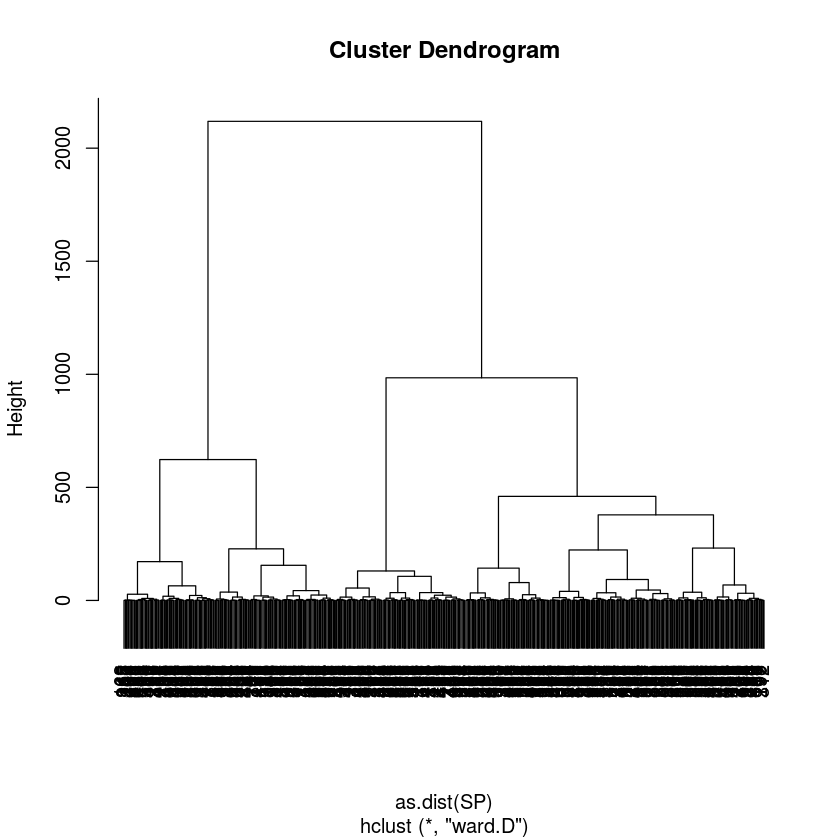

In [120]:
c <- hclust(as.dist(SP), method="ward.D")
plot(c)

In [121]:
library(NMI)

In [122]:
true_labels <- V(G)$firstlevelcommunity
assignments <- cutree(c, k=9)
NMI(data.frame(node = V(G)$id, label = true_labels), data.frame(node = V(G)$id, assignment = assignments))

$value
[1] 0.5199588

In [112]:
max(true_labels)

[1] "9"

In [31]:
library(vegan)

Loading required package: permute

Attaching package: ‘permute’

The following object is masked from ‘package:igraph’:

    permute

Loading required package: lattice
This is vegan 2.4-3

Attaching package: ‘vegan’

The following object is masked from ‘package:igraph’:

    diversity



In [36]:
iso <- isomap(as.dist(distances(G)), ndim=2, k=5)

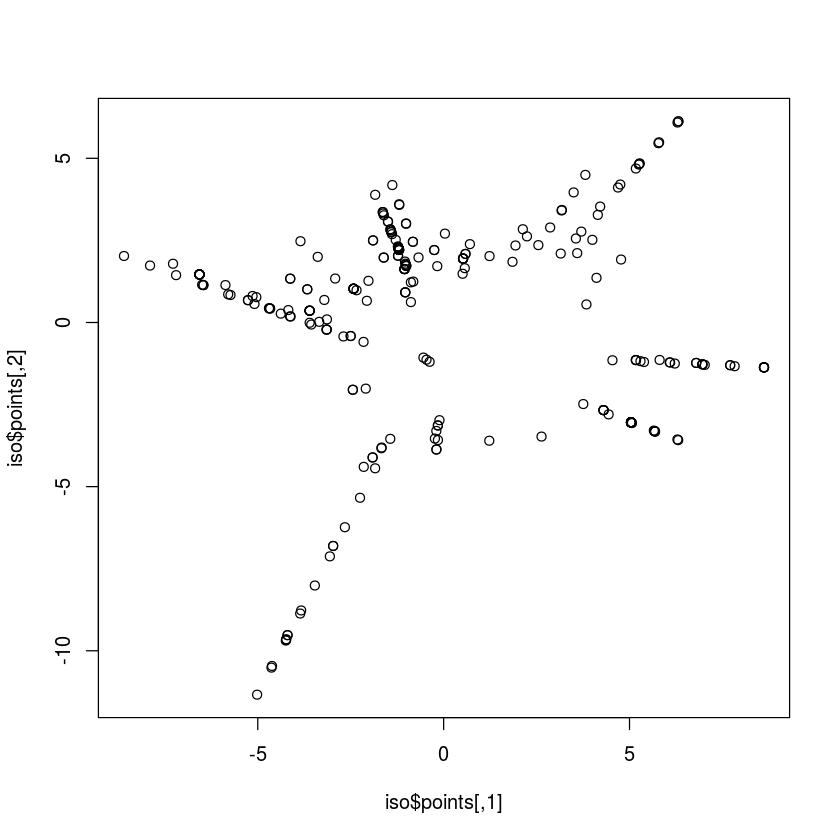

In [38]:
plot(iso$points)

In [55]:
x <- iso$points[,1]
y <- iso$points[,2]

In [56]:
theta <- atan2(y, x)
theta[theta < 0] <- theta[theta < 0] + 2*pi

In [57]:
theta <- sort(theta)

In [59]:
theta_norm <- sapply(1:length(theta), function(i) i * 2 * pi / length(theta))
names(theta_norm) <- names(theta)

In [60]:
theta_norm

YBR270C    YMR236W    YGL112C    YGR119C    YJL041W    YKR026C    YMR269W 
0.02389044 0.04778088 0.07167132 0.09556175 0.11945219 0.14334263 0.16723307 
   YGL122C    YOL123W    YMR255W    YBR274W    YHR016C    YLR258W    YBL007C 
0.19112351 0.21501395 0.23890438 0.26279482 0.28668526 0.31057570 0.33446614 
   YGR268C    YLR243W    YLR432W    YOR138C    YJR072C    YEL062W    YOR262W 
0.35835658 0.38224701 0.40613745 0.43002789 0.45391833 0.47780877 0.50169921 
   YLR150W    YMR267W    YDR167W    YML114C    YML015C    YDR174W    YGL172W 
0.52558965 0.54948008 0.57337052 0.59726096 0.62115140 0.64504184 0.66893228 
   YIL013C    YDR469W    YLR015W    YDL215C    YNL154C    YHR060W   YAL034WA 
0.69282271 0.71671315 0.74060359 0.76449403 0.78838447 0.81227491 0.83616535 
   YPL019C    YLR447C    YCR011C    YMR180C    YCL054W    YER079W    YKL204W 
0.86005578 0.88394622 0.90783666 0.93172710 0.95561754 0.97950798 1.00339841 
   YKL103C    YPR048W    YNL199C    YPR070W    YKR062W    YKL028W    YHR102W 
1.02728885 1.05117929 1.07506973 1.09896017 1.12285061 1.14674104 1.17063148 
   YDR311W    YOR353C    YLR423C    YNR025C    YGR120C    YJL110C    YNL021W 
1.19452192 1.21841236 1.24230280 1.26619324 1.29008368 1.31397411 1.33786455 
   YLR046C    YDR122W    YOR115C    YER116C    YJL064W    YHL006C    YDL013W 
1.36175499 1.38564543 1.40953587 1.43342631 1.45731674 1.48120718 1.50509762 
   YDR148C    YNR029C    YLL046C    YOL082W    YER092W    YDR078C    YDR510W 
1.52898806 1.55287850 1.57676894 1.60065937 1.62454981 1.64844025 1.67233069 
      MEL1    YJL065C    YFR047C    YDR151C    YHR032W    YHR140W    YIL172C 
1.69622113 1.72011157 1.74400201 1.76789244 1.79178288 1.81567332 1.83956376 
   YKL075C    YNL164C    YNL288W    YPL229W    YDL002C    YDR207C    YJL092W 
1.86345420 1.88734464 1.91123507 1.93512551 1.95901595 1.98290639 2.00679683 
   YDL012C    YNL091W    YGL150C    YHL046C    YOL105C    YDR383C    YGL153W 
2.03068727 2.05457771 2.07846814 2.10235858 2.12624902 2.15013946 2.17402990 
   YLR315W    YGL145W    YOR164C    YOR331C    YOR355W    YPR105C    YPR115W 
2.19792034 2.22181077 2.24570121 2.26959165 2.29348209 2.31737253 2.34126297 
   YFL056C    YNL201C    YLR305C    YHR128W    YGL180W    YGR253C    YPR185W 
2.36515340 2.38904384 2.41293428 2.43682472 2.46071516 2.48460560 2.50849604 
   YJR122W    YFR002W    YHR158C    YOR047C    YDR054C    YKL012W    YFR033C 
2.53238647 2.55627691 2.58016735 2.60405779 2.62794823 2.65183867 2.67572910 
   YGL238W    YJR034W    YGR046W    YGR117C    YMR181C    YDL088C    YJL057C 
2.69961954 2.72350998 2.74740042 2.77129086 2.79518130 2.81907173 2.84296217 
   YNL236W    YML031W    YMR129W    YDL011C    YGR057C    YEL023C    YJL088W 
2.86685261 2.89074305 2.91463349 2.93852393 2.96241437 2.98630480 3.01019524 
   YKL039W    YGR099W    YCR022C    YCR050C    YFR057W    YNR048W    YOR006C 
3.03408568 3.05797612 3.08186656 3.10575700 3.12964743 3.15353787 3.17742831 
   YKL015W    YMR153W    YDL110C    YDL017W    YOR078W    YJR117W    YLR323C 
3.20131875 3.22520919 3.24909963 3.27299006 3.29688050 3.32077094 3.34466138 
   YDL160C    YNL118C    YDR315C    YBR094W    YGL208W    YCL046W    YLR264W 
3.36855182 3.39244226 3.41633270 3.44022313 3.46411357 3.48800401 3.51189445 
   YJL211C    YBR196C    YJL178C    YOR062C    YPR040W    YGL115W    YDR477W 
3.53578489 3.55967533 3.58356576 3.60745620 3.63134664 3.65523708 3.67912752 
   YGL192W    YCL055W    YEL015W    YOL149W    YER027C    YBR057C    YGL229C 
3.70301796 3.72690840 3.75079883 3.77468927 3.79857971 3.82247015 3.84636059 
   YER105C    YMR102C    YDR206W    YNL218W    YDR214W    YGL116W    YJL030W 
3.87025103 3.89414146 3.91803190 3.94192234 3.96581278 3.98970322 4.01359366 
   YOR026W    YAL040C    YJL013C    YDL165W    YPL211W    YGR014W    YNL122C 
4.03748409 4.06137453 4.08526497 4.10915541 4.13304585 4.15693629 4.18082673 
   YDR106W    YJL184W    YHR129C    YOR036W    YDL111C    YLR322W    YLR376C 
4.20471716 4.22860760 4.2

In [61]:
r <- 10
x_p <- r * cos(theta_norm)
y_p <- r * sin(theta_norm)

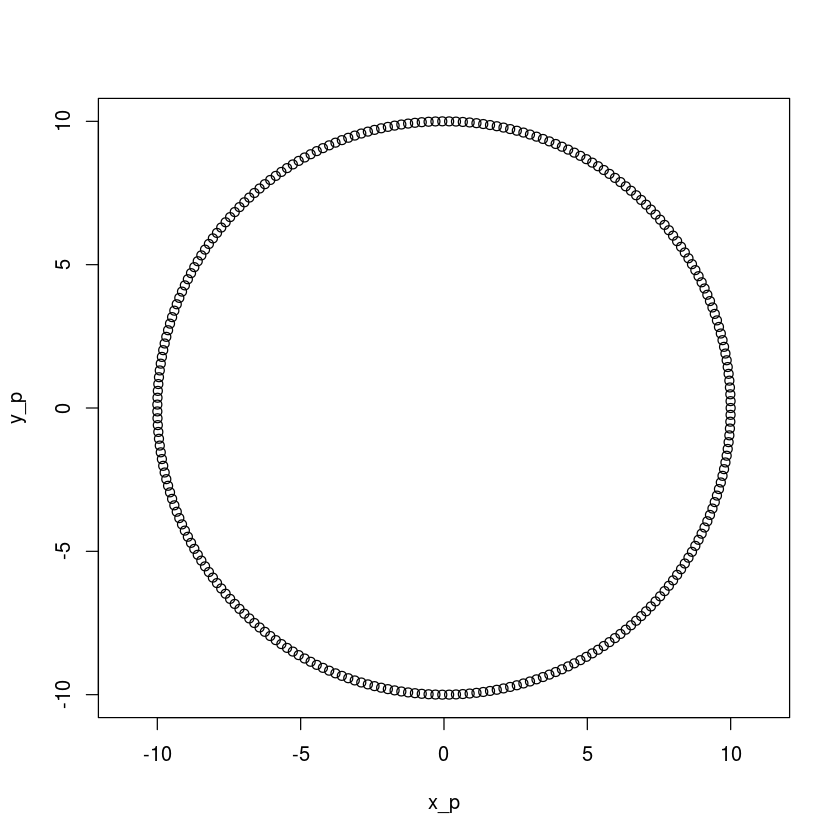

In [62]:
plot(x_p, y_p, asp = 1)